## 2 feature engineering <a id='2_feature engineering'></a>

### 2.1 Load relevant libraries and data

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [96]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [97]:
file='default of credit card clients.xls'
df=pd.read_excel(file, header=1)

In [98]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [99]:
df.rename(columns={'default payment next month': 'DEFAULT'}, inplace=True)

In [100]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [101]:
df.dtypes

ID           int64
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

All data in this data set are object type, although some of them are continous numerical data, for instance, LIMIT_BAL

### 2.2 organize the categorical features

In [102]:
#The data has been already encoded and cleaned. However, some categorical data have repeated categories. 
#For example, the variable EDUCATION has three categories with similar information: 0: unknown, 4: others, 5: unknown, and 6: unknown
#We need combine them into a large category, 4
df.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [103]:
df.EDUCATION.replace([0,5,6], 4, inplace=True)
df.EDUCATION.unique()

array([2, 1, 3, 4], dtype=int64)

In [104]:
#We have the similar problem for MARRIAGE features
df.MARRIAGE.unique()

array([1, 2, 3, 0], dtype=int64)

In [105]:
#We need merge 0 = unknown with 3 = others and list both of them as 3
df.MARRIAGE.replace(0, 3, inplace=True)
df['MARRIAGE'].unique()
#check original paper

array([1, 2, 3], dtype=int64)

In [106]:
df.SEX.unique()

array([2, 1], dtype=int64)

### 2.3 create new variables for the time series features

In [107]:
#check the time series variable sets, their correlation, and their distribution by sns.catplot
#check the past monthly payment
pay=df.filter(regex="PAY_[0-6]", axis=1)
pay.head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0


In [108]:
#rename PAY_0 to PAY_1
pay.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
pay.head()

c:\users\gln_d\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0


In [109]:
pay_default=pd.concat([pay, df.DEFAULT], axis=1)
pay_default.head()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DEFAULT
0,2,2,-1,-1,-2,-2,1
1,-1,2,0,0,0,2,1
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,-1,0,-1,0,0,0,0


<AxesSubplot:xlabel='PAY_6', ylabel='count'>

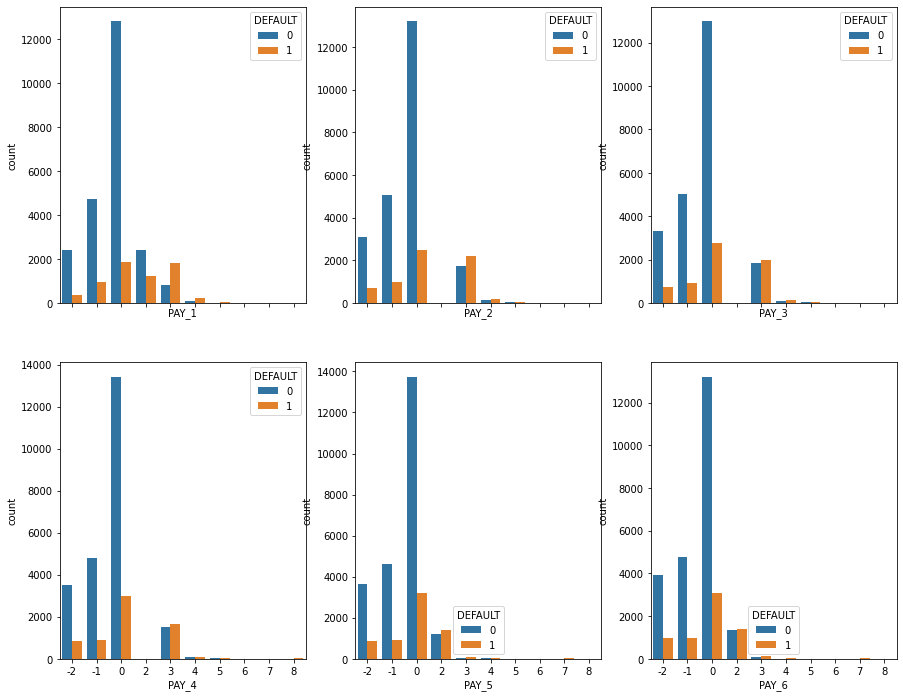

In [110]:
f, axes = plt.subplots(2, 3, figsize=(15, 12), sharex=True)
sns.countplot(x="PAY_1", hue="DEFAULT", data= pay_default, ax=axes[0, 0])
sns.countplot(x="PAY_2", hue="DEFAULT", data= pay_default, ax=axes[0, 1])
sns.countplot(x="PAY_3", hue='DEFAULT', data= pay_default, ax=axes[0, 2])
sns.countplot(x="PAY_4", hue='DEFAULT', data=pay_default, ax=axes[1, 0])
sns.countplot(x="PAY_5", hue='DEFAULT', data=pay_default, ax=axes[1, 1])
sns.countplot(x="PAY_6", hue='DEFAULT', data=pay_default, ax=axes[1,2])

The measurement scale for the payment status is: -2=No consumption; -1 = pay duly; 0 = The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.PAY_0 is payment status in Sep 2005; PAY_1 is payment status in Aug 2005; ...; PAY_6 is payment status in Mar 2005.
For details, check [the discussion](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/discussion/34608).

In [111]:
pay_drop=pay_default.drop(columns=['DEFAULT'], axis=1)
pay_drop.head()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0


In [112]:
#What if we sum up all pay_1, pay_2, pay_3, pay_4 and pay_6 and use it as a new predictor?
p_default = pay_default.copy()
p_default['SUM_p']=pay_drop.agg(np.sum, axis=1)
p_default.head()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DEFAULT,SUM_p
0,2,2,-1,-1,-2,-2,1,-2
1,-1,2,0,0,0,2,1,3
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,-1,0,-1,0,0,0,0,-2


<AxesSubplot:xlabel='DEFAULT', ylabel='SUM_p'>

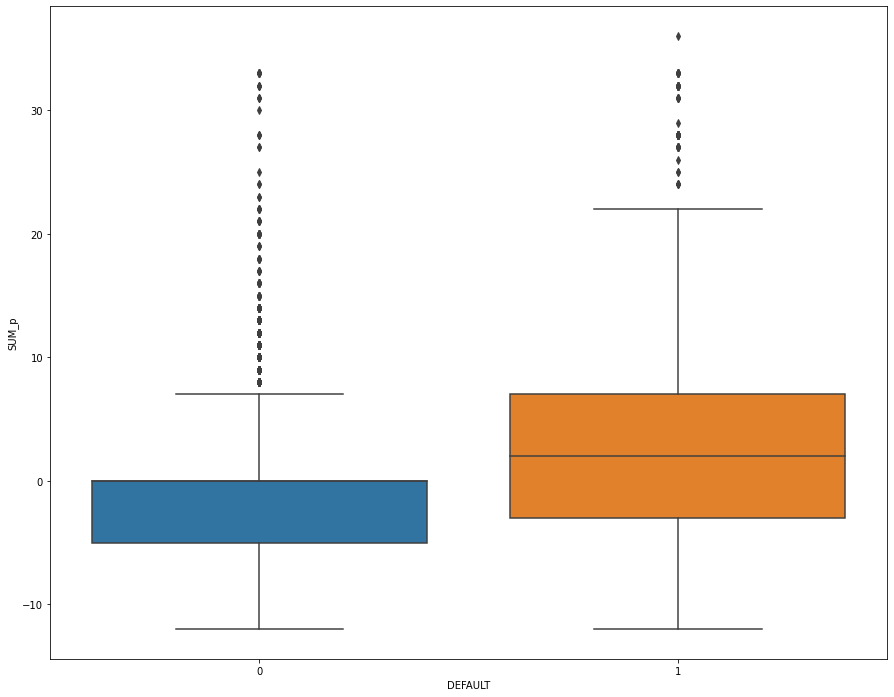

In [113]:
a_dims = (15, 12)
fig, ax = plt.subplots(figsize=a_dims)
sns.boxplot(ax=ax, x='DEFAULT', y= 'SUM_p', data=p_default)

Well, we can see the clients with default credit cards generally have higher sum score of pay. It makes sense because these clients are the ones tend to delay their payment.

In [114]:
#check bill_AMT1 to bill_AMT6
bill=df.filter(regex="BILL_AMT[1-6]", axis=1)
bill.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131


BILL_AMT1 is the bill statement in Sep 2005; BILL_AMT2 is the bill statement in Aug 2005; etc 

In [115]:
b=pd.concat([bill, df.ID], axis=1)
b.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,ID
0,3913,3102,689,0,0,0,1
1,2682,1725,2682,3272,3455,3261,2
2,29239,14027,13559,14331,14948,15549,3
3,46990,48233,49291,28314,28959,29547,4
4,8617,5670,35835,20940,19146,19131,5


In [116]:
b=b.melt(id_vars=['ID'], value_vars=['BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], var_name='Month', value_name='BILL')
b.head()

,ID,Month,BILL
0,1,BILL_AMT1,3913
1,2,BILL_AMT1,2682
2,3,BILL_AMT1,29239
3,4,BILL_AMT1,46990
4,5,BILL_AMT1,8617


In [117]:
b.replace({'BILL_AMT1':9, 'BILL_AMT2':8, 'BILL_AMT3':7, 'BILL_AMT3':6, 'BILL_AMT4':5, 'BILL_AMT5':4, 'BILL_AMT6':3}, inplace=True)
b.head()

,ID,Month,BILL
0,1,9,3913
1,2,9,2682
2,3,9,29239
3,4,9,46990
4,5,9,8617


In [118]:
bill_default=b.merge(df[['ID','DEFAULT']], how='left', on='ID')
bill_default.head()

,ID,Month,BILL,DEFAULT
0,1,9,3913,1
1,2,9,2682,1
2,3,9,29239,0
3,4,9,46990,0
4,5,9,8617,0


<AxesSubplot:xlabel='Month', ylabel='BILL'>

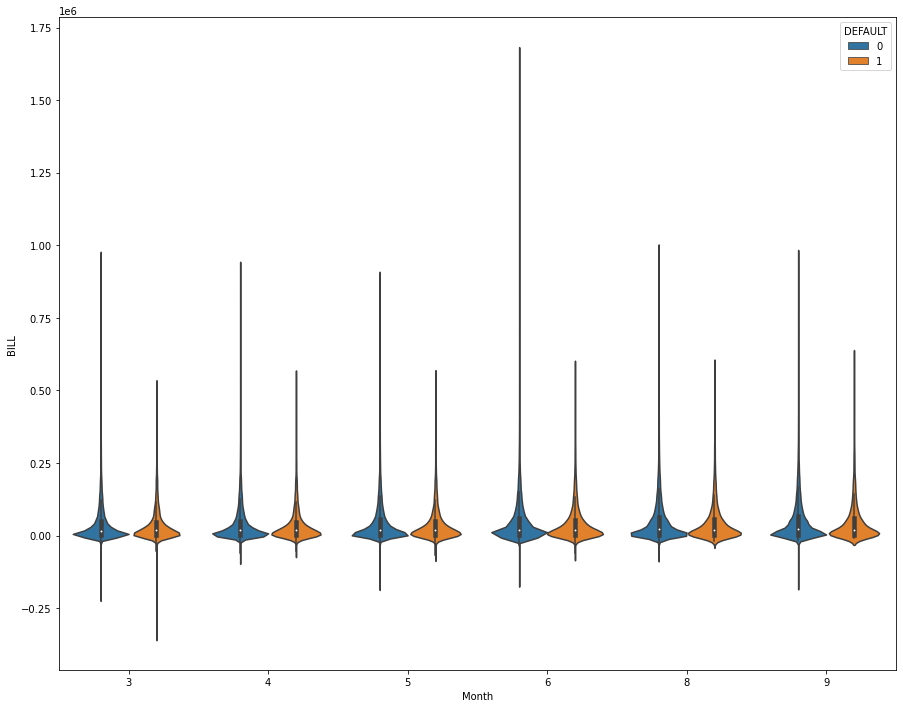

In [119]:
a_dims = (15, 12)
fig, ax = plt.subplots(figsize=a_dims)
sns.violinplot(ax=ax, x="Month", y='BILL', hue="DEFAULT", data= bill_default)

Generally speaking, the bill statement of the clients with default credit card is lower than the clients without default credit card. It is interesting.

In [120]:
#what happens if we sum all bills and use it as the predictor instead of six individual bill statement?
b_default=bill.copy()
b_default['SUM_b']=bill.agg(np.sum, axis=1)
b_default=pd.concat([b_default, df.DEFAULT], axis=1)
b_default.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,SUM_b,DEFAULT
0,3913,3102,689,0,0,0,7704,1
1,2682,1725,2682,3272,3455,3261,17077,1
2,29239,14027,13559,14331,14948,15549,101653,0
3,46990,48233,49291,28314,28959,29547,231334,0
4,8617,5670,35835,20940,19146,19131,109339,0


<AxesSubplot:xlabel='DEFAULT', ylabel='SUM_b'>

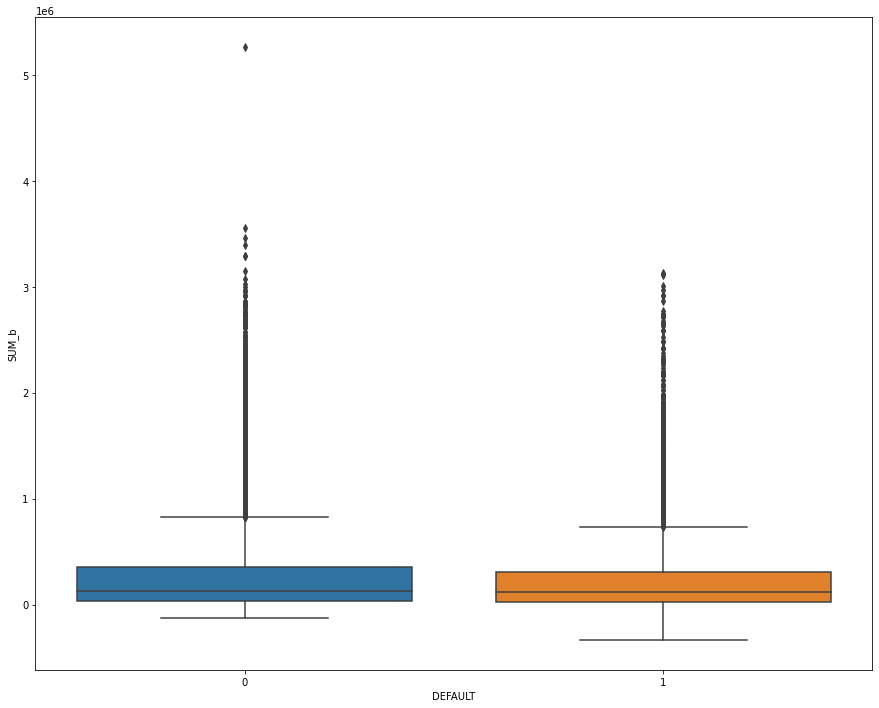

In [121]:
fig, ax = plt.subplots(figsize=a_dims)
sns.boxplot(ax=ax, x='DEFAULT', y= 'SUM_b', data=b_default)

The same pattern can be found in the sum of the bill as the individual bill statement features. People without credit card default tend to have higher bill statement than people with credit card default.

In [122]:
#how about pay_AMT, the amount of previous payment
pay_AMT=df.filter(regex="PAY_AMT[1-6]", axis=1)
pay_AMT.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,689,0,0,0,0
1,0,1000,1000,1000,0,2000
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
4,2000,36681,10000,9000,689,679


In [123]:
p=pd.concat([pay_AMT, df.ID], axis=1)
p=p.melt(id_vars=['ID'], value_vars=['PAY_AMT1','PAY_AMT2','PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], var_name='Month', value_name='pay')
p.replace({'PAY_AMT1':9, 'PAY_AMT2':8, 'PAY_AMT3':7, 'PAY_AMT3':6, 'PAY_AMT4':5, 'PAY_AMT5':4, 'PAY_AMT6':3}, inplace=True)
p.head()

,ID,Month,pay
0,1,9,0
1,2,9,0
2,3,9,1518
3,4,9,2000
4,5,9,2000


<AxesSubplot:xlabel='Month', ylabel='pay'>

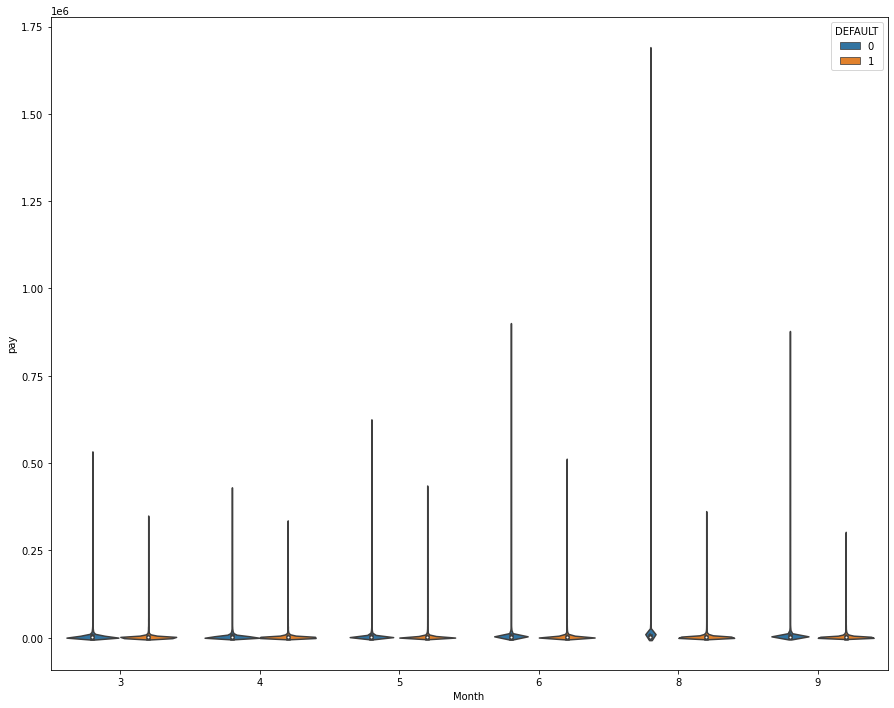

In [124]:
pay_default=p.merge(df[['ID','DEFAULT']], how='left', on='ID')
fig, ax = plt.subplots(figsize=a_dims)
sns.violinplot(ax=ax, x="Month", y='pay', hue="DEFAULT", data= pay_default)

<AxesSubplot:xlabel='DEFAULT', ylabel='SUM_pt'>

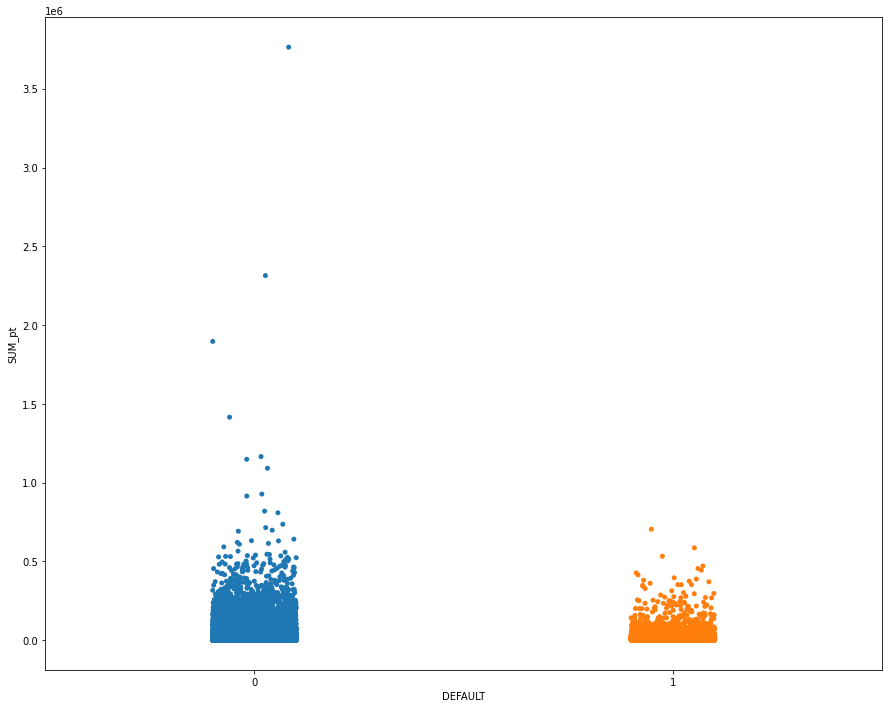

In [125]:
#what happens if we sum all payment and use it as the predictor instead of six individual payment?
p_AMT_default=pay_AMT.copy()
p_AMT_default['SUM_pt']=pay_AMT.agg(np.sum, axis=1)
p_AMT_default=pd.concat([p_AMT_default, df.DEFAULT], axis=1)
fig, ax = plt.subplots(figsize=a_dims)
sns.stripplot(ax=ax, x='DEFAULT', y= 'SUM_pt', data=p_AMT_default)

Comparing all these bill statement and pay statement, we can see the clients without credit card default tend to make more payment than the clients with credit card default, although they tend to have higher bill statement too.

In [126]:
df_sum=pd.concat([df[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'DEFAULT']], p_default.SUM_p, b_default.SUM_b, p_AMT_default.SUM_pt], axis=1)
df_sum.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,DEFAULT,SUM_p,SUM_b,SUM_pt
0,1,20000,2,2,1,24,1,-2,7704,689
1,2,120000,2,2,2,26,1,3,17077,5000
2,3,90000,2,2,2,34,0,0,101653,11018
3,4,50000,2,2,1,37,0,0,231334,8388
4,5,50000,1,2,1,57,0,-2,109339,59049


In [127]:
df_sum.dtypes

ID           int64
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
DEFAULT      int64
SUM_p        int64
SUM_b        int64
SUM_pt       int64
dtype: object

### 2.4 convert some categorical variables into dummy variables

Categorical features without any order of precedence are called nominal features. There are several nominal features in this data set, for instance, sex, marriage and default. Categorical features which have some order associated with them are called ordinal features.such as education. Continous numerical features can turn into ordinal categorical features. For example, we can convert 'AGE' in df into an ordinal features.   

There are many ways to encode categorical variables. For details, we can check [the datacamp tutorial](https://www.datacamp.com/community/tutorials/categorical-data). When we use label encoding, we simply convert the category name into numbers. It's straight-forward, but it has disadvantage. Some algorithms may misinterprete the numerical values. Hence, we need one-hot encoding, which can convert categorical features into dummy variables. We can use pandas.get_dummies(), or LabelBinarizer and OneHotEncoder in the preprocessing module of scikit-learn.

In [128]:
# one-hot encoding for MARRIAGE, SEX, DEFAULT and EDUCATION
df_sum_dummy=pd.get_dummies(df_sum, columns=['MARRIAGE','SEX','EDUCATION'], drop_first=False)
df_sum_dummy.head()

,ID,LIMIT_BAL,AGE,DEFAULT,SUM_p,SUM_b,SUM_pt,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4
0,1,20000,24,1,-2,7704,689,1,0,0,0,1,0,1,0,0
1,2,120000,26,1,3,17077,5000,0,1,0,0,1,0,1,0,0
2,3,90000,34,0,0,101653,11018,0,1,0,0,1,0,1,0,0
3,4,50000,37,0,0,231334,8388,1,0,0,0,1,0,1,0,0
4,5,50000,57,0,-2,109339,59049,1,0,0,1,0,0,1,0,0


In [129]:
df_sum_dummy.shape


(30000, 16)

In [130]:
df_sum_dummy.drop_duplicates().shape

(30000, 16)

In [131]:
df_sum_dummy.isna().sum()

ID             0
LIMIT_BAL      0
AGE            0
DEFAULT        0
SUM_p          0
SUM_b          0
SUM_pt         0
MARRIAGE_1     0
MARRIAGE_2     0
MARRIAGE_3     0
SEX_1          0
SEX_2          0
EDUCATION_1    0
EDUCATION_2    0
EDUCATION_3    0
EDUCATION_4    0
dtype: int64

In [133]:
df_dummy=df.merge(df_sum_dummy, how='left', on='ID')
df_dummy.columns

Index(['ID', 'LIMIT_BAL_x', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE_x', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT_x',
       'LIMIT_BAL_y', 'AGE_y', 'DEFAULT_y', 'SUM_p', 'SUM_b', 'SUM_pt',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'SEX_1', 'SEX_2',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4'],
      dtype='object')

In [134]:
df_dummy=df_dummy.drop(['MARRIAGE', 'SEX', 'EDUCATION', 'SUM_p', 'SUM_b', 'SUM_pt','LIMIT_BAL_y', 'AGE_y', 'DEFAULT_y'], axis=1)
df_dummy.columns

Index(['ID', 'LIMIT_BAL_x', 'AGE_x', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT_x', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3', 'SEX_1', 'SEX_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4'],
      dtype='object')

In [135]:
df_dummy.rename({'LIMIT_BAL_x':'LIMIT', 'PAY_0':'PAY_1', 'AGE_x':'AGE', 'DEFAULT_x':'DEFAULT'}, axis=1, inplace=True)
df_dummy.columns

Index(['ID', 'LIMIT', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3', 'SEX_1', 'SEX_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4'],
      dtype='object')

### 2.5 check continous numerical variable and determine whether we need to convert them into categorical features

<AxesSubplot:xlabel='DEFAULT', ylabel='AGE'>

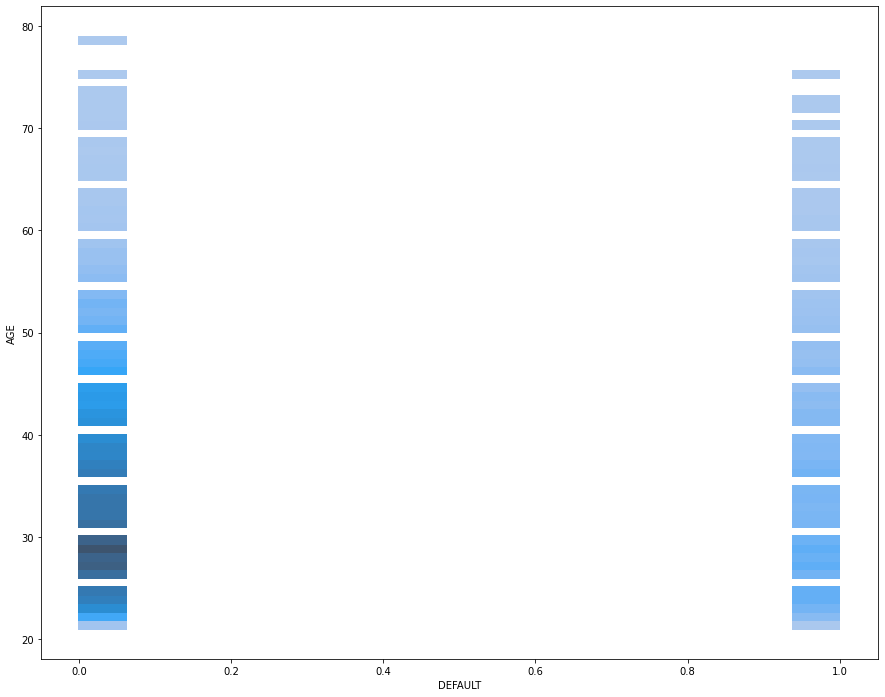

In [136]:
fig, ax = plt.subplots(figsize=a_dims)
sns.histplot(ax=ax, x='DEFAULT', y= 'AGE', data=df)

There are two different functions in [seaborn](https://seaborn.pydata.org/tutorial/function_overview.html), axes-level, and figure-level. Axes-level functions plot data onto a single matplotlib.pyplot.Axes object, which is the return value of the function. We can edit the figure through setting axes. In contrast, figure-level functions interface with matplotlib through a seaborn object, usually a FaceGrid, that manages the figure. relplot, displot and catplot are figure-level functions. The rest are axes-level function. 
![image of function in seaborn](https://seaborn.pydata.org/_images/function_overview_8_0.png)

Because AGE is continous feature with the range from 20 to 80, we need at least 6 levels if we convert it into ordinal categorial features. Thus, we decided to keep it as it is now. With the same reason, we decided to keep all the other continous features, such as LIMIT_BAL.

<AxesSubplot:xlabel='DEFAULT', ylabel='LIMIT_BAL'>

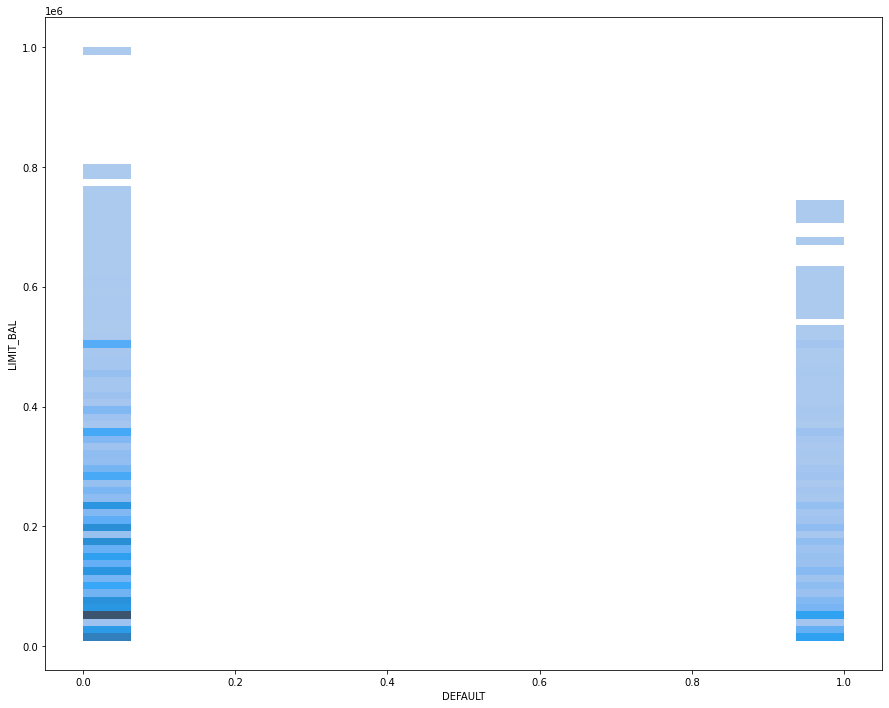

In [137]:
fig, ax = plt.subplots(figsize=a_dims)
sns.histplot(ax=ax, x='DEFAULT', y= 'LIMIT_BAL', data=df)

### 2.6 check the data type of all features

In [138]:
#Let's check df_dummy first
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           30000 non-null  int64
 1   LIMIT        30000 non-null  int64
 2   AGE          30000 non-null  int64
 3   PAY_1        30000 non-null  int64
 4   PAY_2        30000 non-null  int64
 5   PAY_3        30000 non-null  int64
 6   PAY_4        30000 non-null  int64
 7   PAY_5        30000 non-null  int64
 8   PAY_6        30000 non-null  int64
 9   BILL_AMT1    30000 non-null  int64
 10  BILL_AMT2    30000 non-null  int64
 11  BILL_AMT3    30000 non-null  int64
 12  BILL_AMT4    30000 non-null  int64
 13  BILL_AMT5    30000 non-null  int64
 14  BILL_AMT6    30000 non-null  int64
 15  PAY_AMT1     30000 non-null  int64
 16  PAY_AMT2     30000 non-null  int64
 17  PAY_AMT3     30000 non-null  int64
 18  PAY_AMT4     30000 non-null  int64
 19  PAY_AMT5     30000 non-null  int64
 20  PAY_AM

In [139]:
#Then we check df_sum_dummy
df_sum_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           30000 non-null  int64
 1   LIMIT_BAL    30000 non-null  int64
 2   AGE          30000 non-null  int64
 3   DEFAULT      30000 non-null  int64
 4   SUM_p        30000 non-null  int64
 5   SUM_b        30000 non-null  int64
 6   SUM_pt       30000 non-null  int64
 7   MARRIAGE_1   30000 non-null  uint8
 8   MARRIAGE_2   30000 non-null  uint8
 9   MARRIAGE_3   30000 non-null  uint8
 10  SEX_1        30000 non-null  uint8
 11  SEX_2        30000 non-null  uint8
 12  EDUCATION_1  30000 non-null  uint8
 13  EDUCATION_2  30000 non-null  uint8
 14  EDUCATION_3  30000 non-null  uint8
 15  EDUCATION_4  30000 non-null  uint8
dtypes: int64(7), uint8(9)
memory usage: 1.9 MB


It's time for us to export these two data sets and use them for modelling in section 3.

### 2.7 export df_sum_dummy and df_dummy

In [145]:
import os
os.getcwd()

'C:\\Users\\gln_d\\Desktop\\Springboard\\Capstone_project_Spring_Board\\credit_card_default'

In [146]:
#how to dump data into the data folder
datapath = './data'
if not os.path.exists(datapath):
    os.mkdir(datapath)
datapath_df_dummy = os.path.join(datapath, 'df_dummy.csv')
if not os.path.exists(datapath_df_dummy):
    df_dummy.to_csv(datapath_df_dummy, index=False)

In [147]:
datapath_df_sum_dummy = os.path.join(datapath, 'df_sum_dummy.csv')
if not os.path.exists(datapath_df_sum_dummy):
    df_dummy.to_csv(datapath_df_sum_dummy, index=False)